# Two-Level: Weak CW through Few Atoms with Decay

Time taken to solve this problem on a 2013 MacBook Pro:
**1min 37s**.

## Define the Problem

In [1]:
mb_solve_json = """
{
  "ob_atom": {
    "decays": [
      {
        "channels": [[0, 1]],
        "rate": 1.0
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 1.0e-3,
        "rabi_freq_t_args": {
          "ampl_1": 1.0,
          "on_1": 0.0,
          "off_1": 8.0,
          "fwhm_1": 1.0
        },
        "rabi_freq_t_func": "ramp_onoff_1"
      }
    ],
    "num_states": 2
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 100,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 100,
  "z_steps_inner": 2,
  "num_density_z_func": "square_1",
  "num_density_z_args": {
    "on_1": 0.0,
    "off_1": 1.0,
    "ampl_1": 1.0
  },
  "interaction_strengths": [
    1.0
  ],
  "velocity_classes": {
    "thermal_delta_min": -0.0,
    "thermal_delta_max": 0.0,
    "thermal_delta_steps": 0,
    "thermal_delta_inner_min": 0.0,
    "thermal_delta_inner_max": 0.0,
    "thermal_delta_inner_steps": 0,
    "thermal_width": 1.0
  },
  "method": "mesolve",
  "opts": {},
  "savefile": "qu/mb-solve-two-weak-cw-few-atoms-decay"
}
"""

In [2]:
from maxwellbloch import mb_solve
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

## Solve the Problem

In [3]:
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(recalc=True)

10.0%. Run time:   3.63s. Est. time left: 00:00:00:32
20.0%. Run time:   6.29s. Est. time left: 00:00:00:25
30.0%. Run time:   9.57s. Est. time left: 00:00:00:22
40.0%. Run time:  12.49s. Est. time left: 00:00:00:18
50.0%. Run time:  15.10s. Est. time left: 00:00:00:15
60.0%. Run time:  17.70s. Est. time left: 00:00:00:11
70.0%. Run time:  20.27s. Est. time left: 00:00:00:08
80.0%. Run time:  22.86s. Est. time left: 00:00:00:05
90.0%. Run time:  25.51s. Est. time left: 00:00:00:02
Total run time:  28.36s
Saving MBSolve to qu/mb-solve-two-weak-cw-few-atoms-decay .qu
CPU times: user 26.6 s, sys: 395 ms, total: 27 s
Wall time: 28.6 s


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

## Field Output

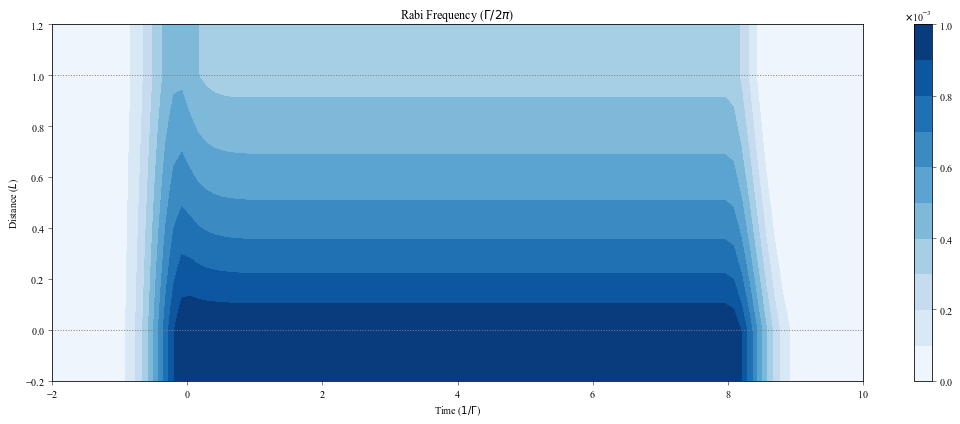

In [5]:
fig = plt.figure(1, figsize=(16, 6))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf)
plt.savefig('images/mb-solve-two-weak-cw-few-atoms-decay.png')

## Fixed Frame

In [6]:
from maxwellbloch import fixed

speed_of_light = 0.25 # [L Γ]

tlist_fixed_frame = fixed.t_list(mb_solve_00, speed_of_light)
field_fixed_frame = fixed.rabi_freq_abs(mb_solve_00, 0, speed_of_light);

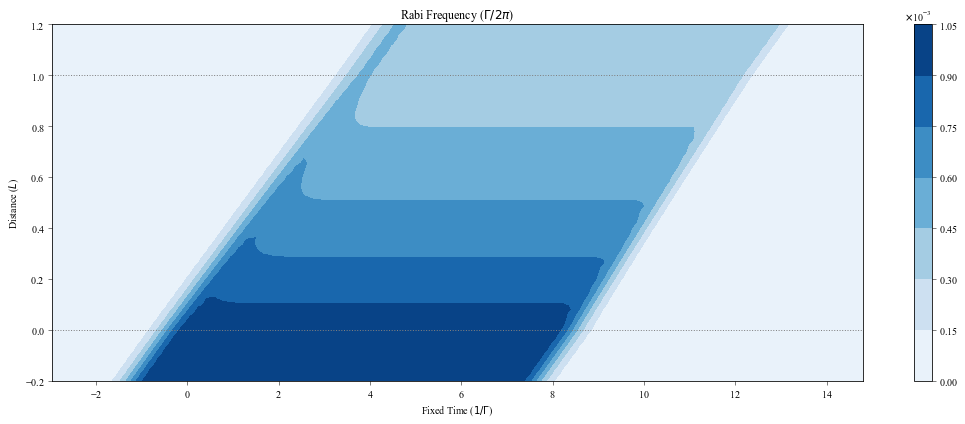

In [7]:
y_min = 0.0
y_max = 1.0e-3
speed_of_light = 0.25

fig = plt.figure(1, figsize=(16, 6))
ax = fig.add_subplot(111)
cf = ax.contourf(tlist_fixed_frame, 
                 mb_solve_00.zlist, 
                 field_fixed_frame/(2*np.pi), 
                 cmap=plt.cm.Blues)

ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Fixed Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf)